# 00 Post process using class

Based on tools and scripts provided by Michael Brazell and Lawrence Cheung

Utilize the abl_stats class to carry out post processing

See https://github.com/Exawind/amr-wind-frontend/blob/main/docs/casestudies/SWIFT/Postprocessing.ipynb

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import netCDF4 as ncdf
import pandas as pd
import os

In [2]:
from moa_python.post_abl_stats import Post_abl_stats
from moa_python.post_plane import Post_plane

## Case 004

In [5]:
case_folder = '/scratch/pfleming/c2c/004_abl_neutral_highTI_redo'

abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl = Post_abl_stats([full_filename_abl_stats])

Object is composed of 1 and time runs from 18000.05 to 20000.049999970895
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: e0ffbb62eb60-dirty
    created_on: Tue Apr 18 17:14:45 2023

    dimensions(sizes): num_time_steps(40001), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


In [6]:
abl.mean_profiles

array([<class 'netCDF4._netCDF4.Group'>
       group /mean_profiles:
           dimensions(sizes): nlevels(128)
           variables(dimensions): float64 h(nlevels), float64 u(num_time_steps, nlevels), float64 v(num_time_steps, nlevels), float64 w(num_time_steps, nlevels), float64 hvelmag(num_time_steps, nlevels), float64 theta(num_time_steps, nlevels), float64 mueff(num_time_steps, nlevels), float64 theta'theta'_r(num_time_steps, nlevels), float64 u'theta'_r(num_time_steps, nlevels), float64 v'theta'_r(num_time_steps, nlevels), float64 w'theta'_r(num_time_steps, nlevels), float64 u'u'_r(num_time_steps, nlevels), float64 u'v'_r(num_time_steps, nlevels), float64 u'w'_r(num_time_steps, nlevels), float64 v'v'_r(num_time_steps, nlevels), float64 v'w'_r(num_time_steps, nlevels), float64 w'w'_r(num_time_steps, nlevels), float64 u'u'u'_r(num_time_steps, nlevels), float64 v'v'v'_r(num_time_steps, nlevels), float64 w'w'w'_r(num_time_steps, nlevels), float64 u'theta'_sfs(num_time_steps, nlevels)

In [9]:
settling_time = 19000
height = 90

Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0


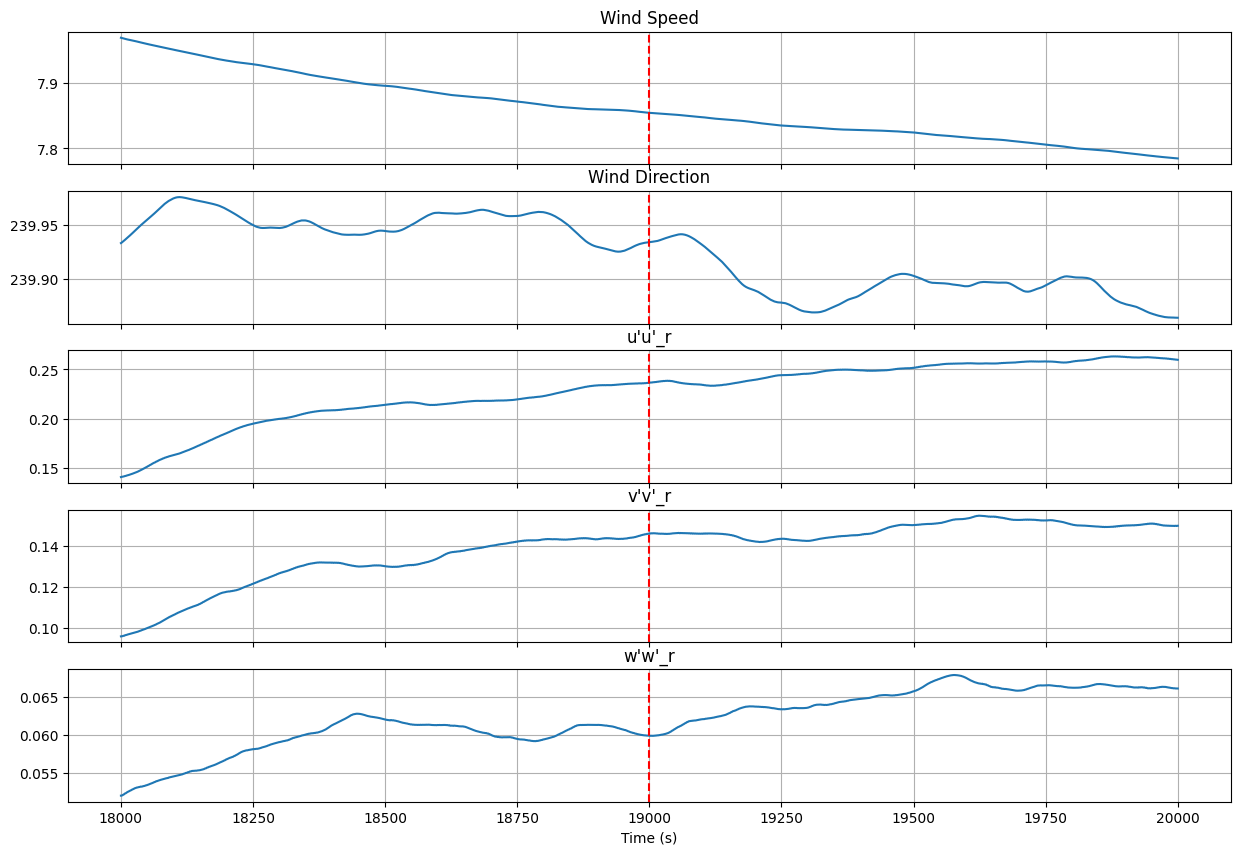

In [10]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

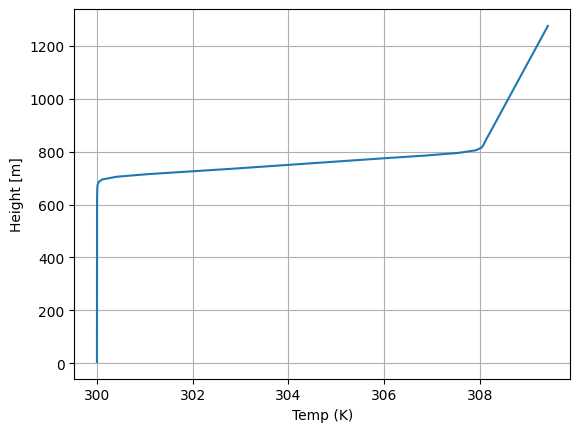

In [11]:
abl.plot_vertical_temp_profile(t_min=settling_time)

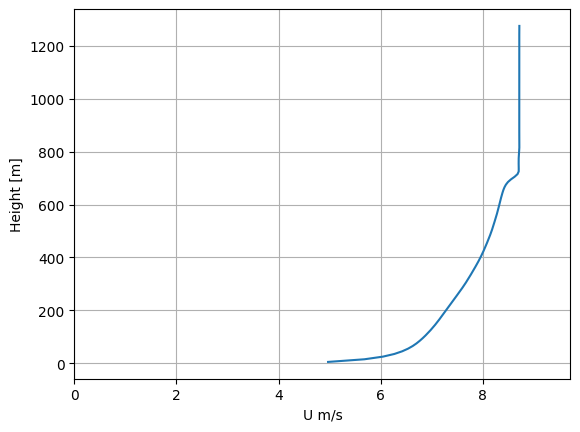

In [12]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [13]:
TI = abl.get_turbulence_intensity_at_height(height, t_min=settling_time)

print('Turbulence Intensity [%]: ', TI)

Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Turbulence Intensity [%]:  5.028773855651526


Nearest height to 5.0 is 5.0
Nearest height to 5.0 is 5.0
Nearest height to 5.0 is 5.0
Nearest height to 5.0 is 5.0
Nearest height to 5.0 is 5.0
Nearest height to 5.0 is 5.0
Nearest height to 15.0 is 15.0
Nearest height to 15.0 is 15.0
Nearest height to 15.0 is 15.0
Nearest height to 15.0 is 15.0
Nearest height to 15.0 is 15.0
Nearest height to 15.0 is 15.0
Nearest height to 25.0 is 25.0
Nearest height to 25.0 is 25.0
Nearest height to 25.0 is 25.0
Nearest height to 25.0 is 25.0
Nearest height to 25.0 is 25.0
Nearest height to 25.0 is 25.0
Nearest height to 35.0 is 35.0
Nearest height to 35.0 is 35.0
Nearest height to 35.0 is 35.0
Nearest height to 35.0 is 35.0
Nearest height to 35.0 is 35.0
Nearest height to 35.0 is 35.0
Nearest height to 45.0 is 45.0
Nearest height to 45.0 is 45.0
Nearest height to 45.0 is 45.0
Nearest height to 45.0 is 45.0
Nearest height to 45.0 is 45.0
Nearest height to 45.0 is 45.0
Nearest height to 55.0 is 55.0
Nearest height to 55.0 is 55.0
Nearest height to 55

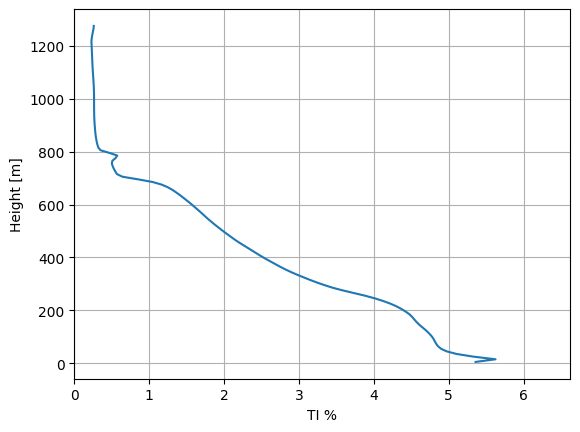

In [15]:
abl.plot_turbulence_intensity_profile(t_min=settling_time)

In [16]:
hor_plane = Post_plane(full_filename_hor_plane)

Plane has 1 plane(s) in 801 time steps from 18000.0 to 19999.999999970896
Plane levels: [0.]


Plotting u velocity plane for height 90 at time 19000
Nearest height to 90 is 0.0
Nearest time to 19000 is 18999.999999985448
Returning u velocity plane for slice at 0.0 at time 18999.999999985448


<Axes: xlabel='X [m]', ylabel='Y [m]'>

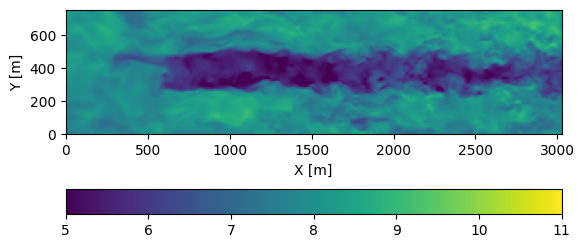

In [17]:
hor_plane.plot_plane(height,settling_time, vmin=5., vmax=11.)

Plotting u mean velocity plane for slice at 90
Nearest height to 90 is 0.0
Returning u mean velocity plane for slice at 0.0


<Axes: xlabel='X [m]', ylabel='Y [m]'>

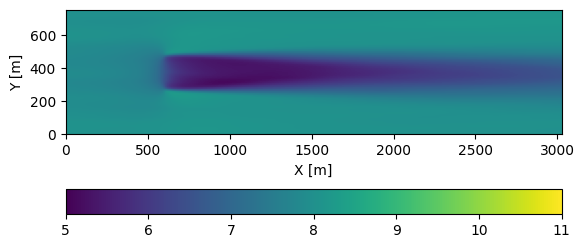

In [18]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)

## Case 004 Restart

In [12]:
case_folder = '/scratch/pfleming/c2c/example_sim'
settling_time = settling_time + 0.5

In [13]:
abl_stats_file = 'post_processing/abl_statistics14400.nc'
hor_plane_file = 'post_processing/samplingPlane14400.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl_restart = Post_abl_stats([full_filename_abl_stats])

Object is composed of 1 and time runs from 7200.5 to 10799.5
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 26ef3dd367c8
    created_on: Tue Jan 31 14:27:29 2023

    dimensions(sizes): num_time_steps(7199), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0


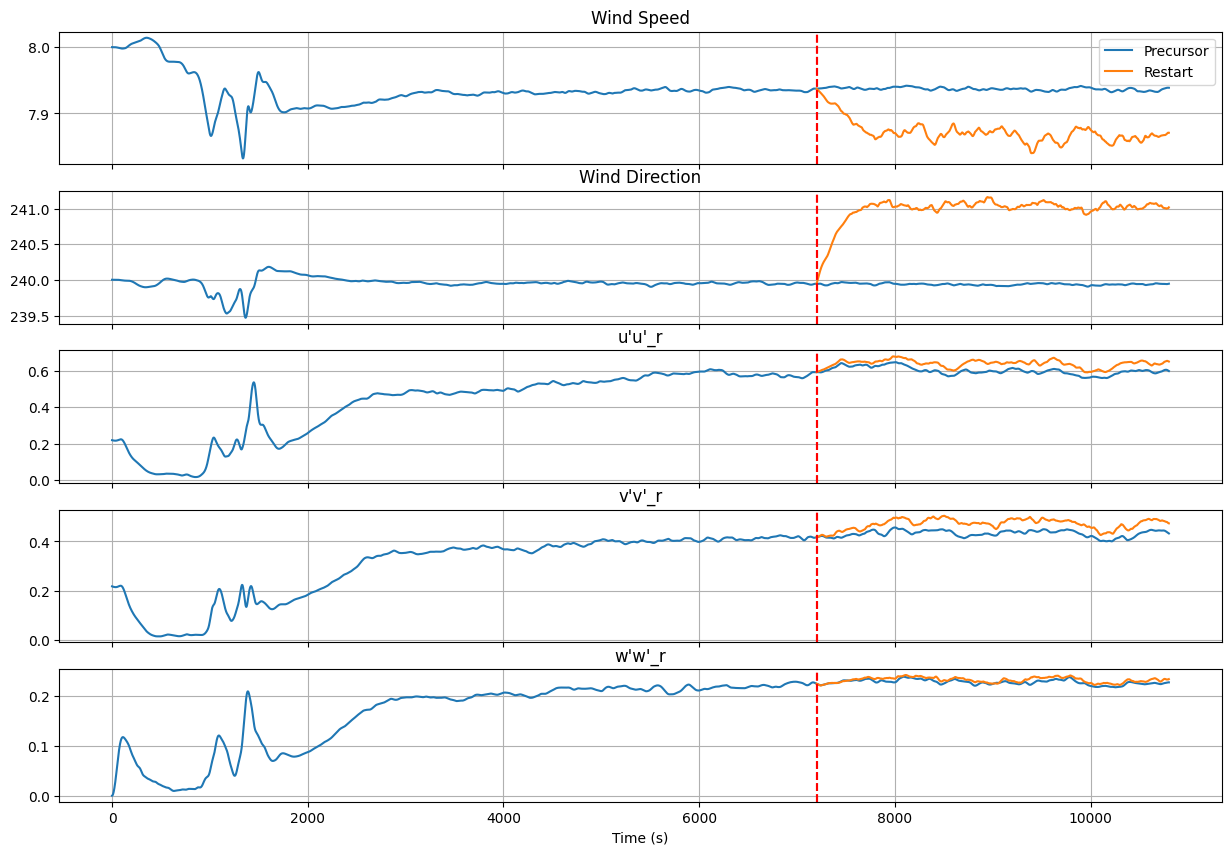

In [14]:
fig, axarr = plt.subplots(5,1,figsize=(15,10), sharex=True)
abl.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Precursor')
abl_restart.plot_wind_measurements_at_height(height, settling_time=settling_time, axarr=axarr, label='Restart')

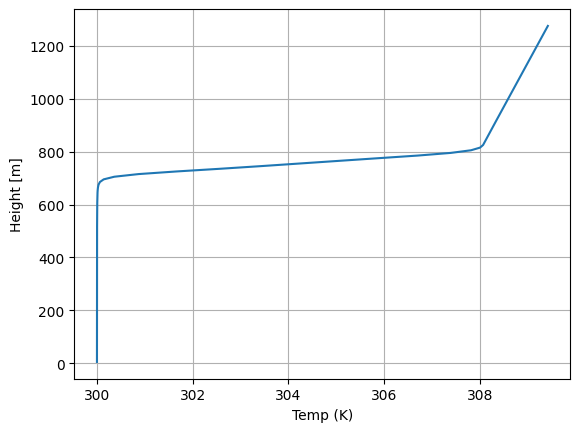

In [43]:
abl.plot_vertical_temp_profile(t_min=settling_time)

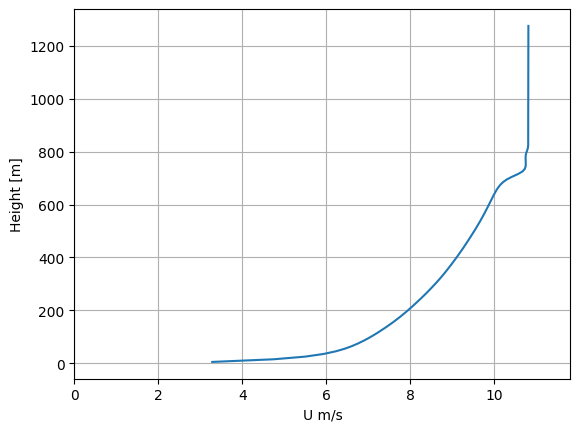

In [44]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [45]:
hor_plane = Post_plane(full_filename_hor_plane)

Hor_plane has 4 horizontal planes in 2 time steps from 7200.0 to 9000.0
Hor_plane levels: [  5.  85. 155. 255.]


Plotting u velocity hor_plane for height 90 at time 9000
Nearest height to 90 is 85.0
Nearest time to 9000 is 9000.0
Returning u velocity hor_plane for height 85.0 at time 9000.0


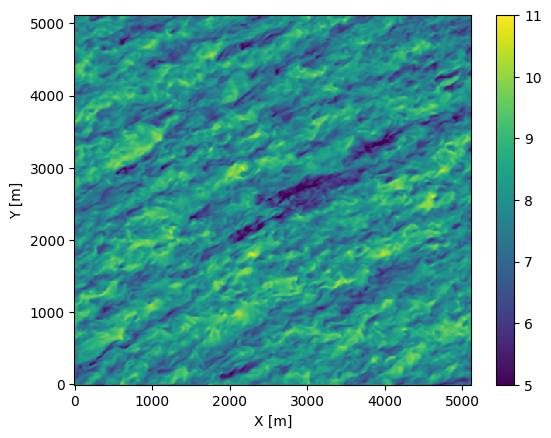

In [46]:
hor_plane.plot_plane(height,9000, vmin=5., vmax=11.)

Plotting u mean velocity hor_plane for height 90
Nearest height to 90 is 85.0
Returning u mean velocity hor_plane for height 85.0


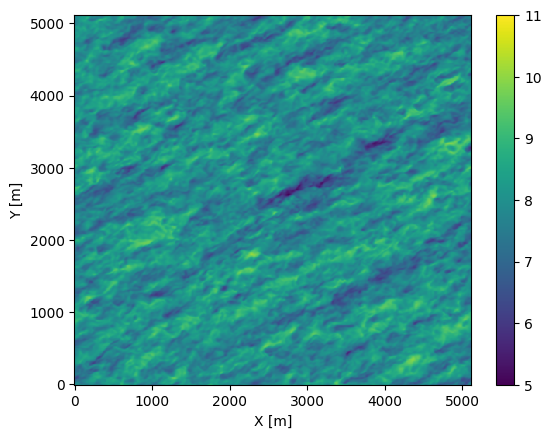

In [47]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)

### Case 005

In [14]:
case_folder = '/scratch/pfleming/c2c/005_abl_neutral_lowTI_redo'


abl_stats_file = 'post_processing/abl_statistics00000.nc'
hor_plane_file = 'post_processing/samplingPlane00000.nc'

full_filename_abl_stats = os.path.join(case_folder,abl_stats_file )
full_filename_hor_plane = os.path.join(case_folder,hor_plane_file )
abl = Post_abl_stats([full_filename_abl_stats])

Object is composed of 1 and time runs from 0.5 to 10800.0
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: AMR-Wind ABL statistics output
    version: 26ef3dd367c8
    created_on: Mon Jan 30 12:03:14 2023

    dimensions(sizes): num_time_steps(21600), ndim(3)
    variables(dimensions): float64 time(num_time_steps), float64 Q(num_time_steps), float64 Tsurf(num_time_steps), float64 ustar(num_time_steps), float64 wstar(num_time_steps), float64 L(num_time_steps), float64 zi(num_time_steps), float64 abl_forcing_x(num_time_steps), float64 abl_forcing_y(num_time_steps)
    groups: mean_profiles


Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0
Nearest height to 90 is 85.0


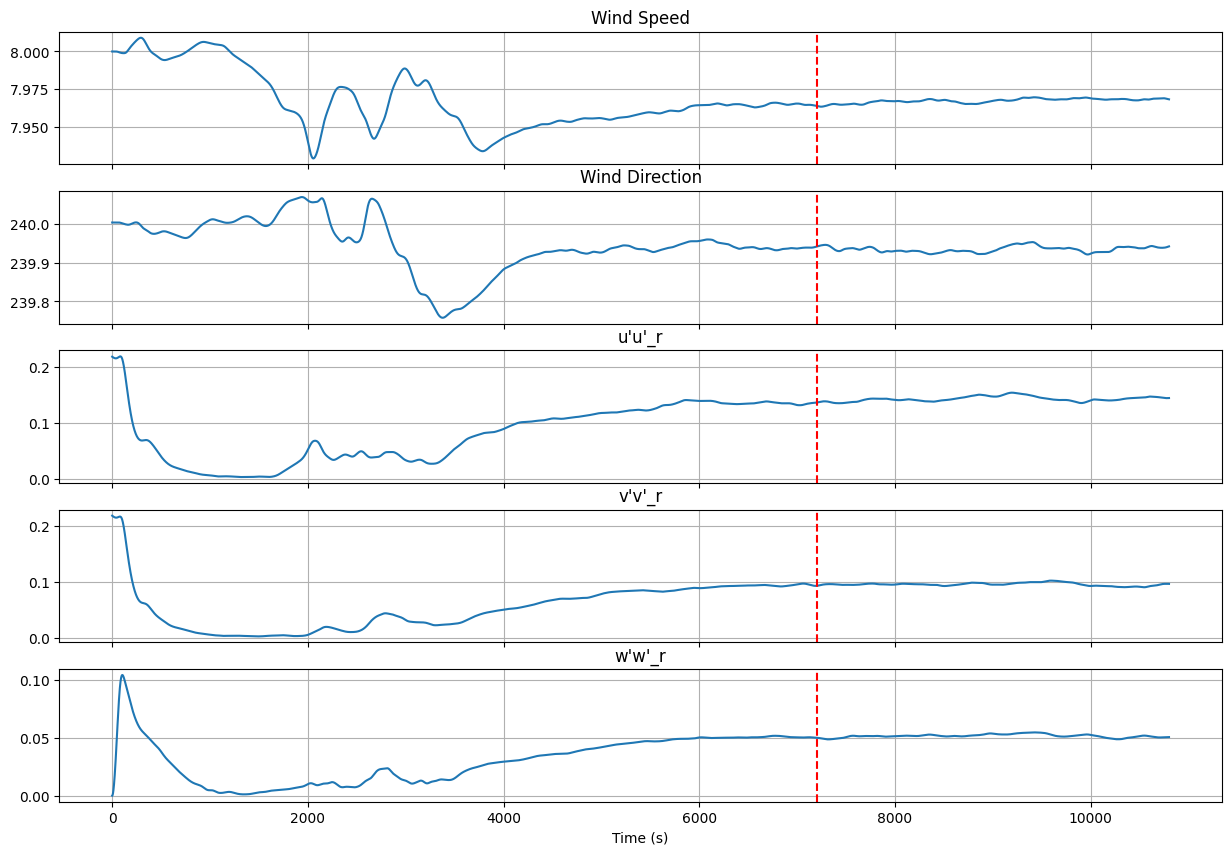

In [15]:
abl.plot_wind_measurements_at_height(height, settling_time=settling_time)

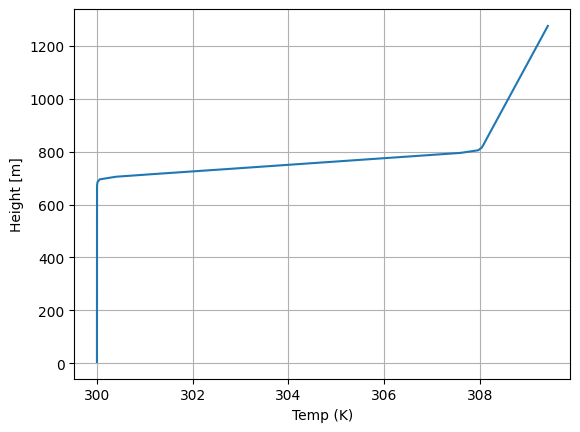

In [16]:
abl.plot_vertical_temp_profile(t_min=settling_time)

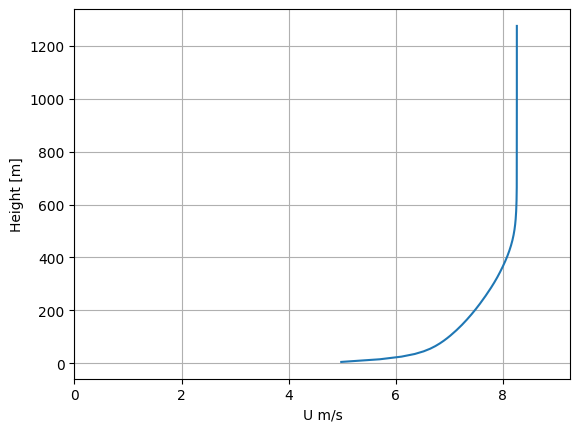

In [17]:
abl.plot_vertical_vel_profile(t_min=settling_time)

In [18]:
hor_plane = Post_hor_plane(full_filename_hor_plane)

Hor_plane has 4 horizontal planes in 7 time steps from 0.0 to 10800.0
Hor_plane levels: [  5.  85. 155. 255.]


Plotting u velocity hor_plane for height 90 at time 7200
Nearest height to 90 is 85.0
Nearest time to 7200 is 7200.0
Returning u velocity hor_plane for height 85.0 at time 7200.0


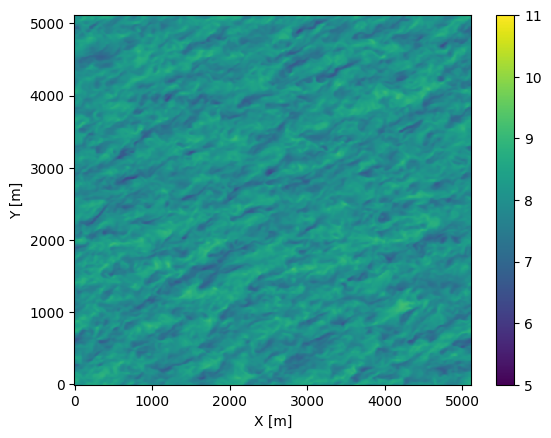

In [19]:
hor_plane.plot_plane(height,settling_time, vmin=5., vmax=11.)

Plotting u mean velocity hor_plane for height 90
Nearest height to 90 is 85.0
Returning u mean velocity hor_plane for height 85.0


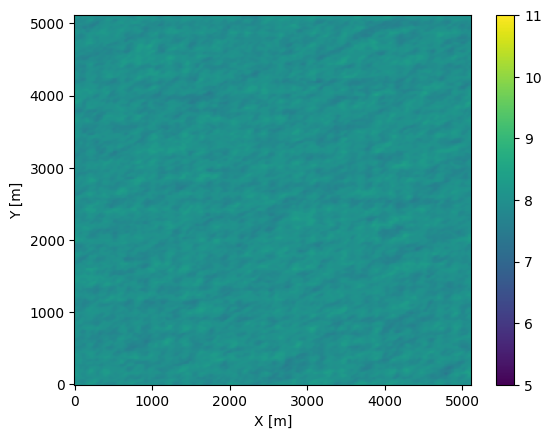

In [20]:
hor_plane.plot_mean_plane(height, vmin=5., vmax=11.)